# **Neural networks with Pytorch**
---
---

### Libraries

In [40]:
import numpy as np
from tqdm import tqdm
from skimage import transform,io

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim  as optim

from torchvision import utils
from torchvision import datasets
from torchvision import transforms

import matplotlib.pyplot as plt

### Dataset

In [41]:
train=datasets.MNIST("",train=True,download=True,transform=transforms.Compose([
    transforms.ToTensor()
]))

test=datasets.MNIST("",train=False,download=True,transform=transforms.Compose([
    transforms.ToTensor()
]))

trainset= torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset= torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

### Models

In [42]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(784, 64, bias=True)
        self.fc2=nn.Linear(64, 32, bias=True)
        self.fc3=nn.Linear(32, 16, bias=True)
        self.fc4=nn.Linear(16, 10, bias=True)
    
    def forward(self,x):
        x= F.relu(self.fc1(x)) 
        x= F.relu(self.fc2(x))
        x= F.relu(self.fc3(x)) 
        x= self.fc4(x)
        return F.softmax(x, dim=1)
    
net_class=Net()    
    
net_seque = nn.Sequential( 
            nn.Linear(784, 64), 
            nn.ReLU(),
            nn.Linear(64, 32),   
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 10),
            nn.Softmax(dim=1)
            )

class FO:
    P = '\033[95m'    #PURPLE
    C = '\033[96m'      #CYAN
    D = '\033[36m'  #DARKCYAN
    B = '\033[94m'      #BLUE
    G = '\033[92m'     #GREEN
    Y = '\033[93m'    #YELLOW
    R = '\033[91m'       #RED
    N = '\033[1m'       #BOLD
    U = '\033[4m'  #UNDERLINE
    E = '\033[0m'        #END

print(FO.B+'Network with class\n\n'+FO.E, net_class, FO.B+'\n\nNetwork with sequential\n\n'+FO.E, net_seque)

Network with class

 Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=10, bias=True)
) 

Network with sequential

 Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=16, bias=True)
  (5): ReLU()
  (6): Linear(in_features=16, out_features=10, bias=True)
  (7): Softmax(dim=1)
)


### Training

In [43]:
optimizer = optim.Adam(net_class.parameters(), lr=0.001)

EPOCHS=3

for epoch in range(EPOCHS):
    for data in tqdm(trainset, desc='Loss calculation'):
        X,y=data
        net_class.zero_grad()
        output=net_class(X.view(-1,28*28))
        
        loss = F.nll_loss(output, y)
        
        loss.backward()
        
        optimizer.step()

    print(loss)

Loss calculation:   0%|          | 16/6000 [00:00<00:38, 157.28it/s]

tensor(-0.9716, grad_fn=<NllLossBackward>)


Loss calculation:   0%|          | 18/6000 [00:00<00:33, 176.95it/s]

tensor(-0.9993, grad_fn=<NllLossBackward>)


Loss calculation: 100%|██████████| 6000/6000 [00:36<00:00, 163.72it/s]

tensor(-1.0000, grad_fn=<NllLossBackward>)


In [44]:
optimizer = optim.Adam(net_seque.parameters(), lr=0.001)

EPOCHS=3

for epoch in range(EPOCHS):
    for data in tqdm(trainset, desc='Loss calculation'):
        X,y=data
    
        net_seque.zero_grad()
        
        output=net_seque(X.view(-1,28*28))
        
        loss = F.nll_loss(output, y)
        
        loss.backward()
        
        optimizer.step()

    print(loss)

Loss calculation:   0%|          | 11/6000 [00:00<00:54, 109.20it/s]

tensor(-0.8985, grad_fn=<NllLossBackward>)


Loss calculation:   0%|          | 16/6000 [00:00<00:39, 152.80it/s]

tensor(-0.8967, grad_fn=<NllLossBackward>)


Loss calculation: 100%|██████████| 6000/6000 [00:35<00:00, 169.53it/s]

tensor(-0.9998, grad_fn=<NllLossBackward>)


### Accuracy

In [45]:
correct=0
total=0

with torch.no_grad():
    for data in tqdm(trainset, desc='Accuracy calculation'):
        X,y=data
        output=net_class(X.view(-1,28*28))
        for idx,i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct +=1
            total+=1
            
print('Accuracy: ',round(correct/total,3))

Accuracy calculation: 100%|██████████| 6000/6000 [00:16<00:00, 371.80it/s]

Accuracy:  0.949


In [46]:
correct=0
total=0

with torch.no_grad():
    for data in tqdm(trainset, desc='Accuracy calculation'):
        X,y=data
        output=net_seque(X.view(-1,28*28))
        for idx,i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct +=1
            total+=1
            
print('Accuracy: ',round(correct/total,3))

Accuracy calculation: 100%|██████████| 6000/6000 [00:15<00:00, 384.82it/s]

Accuracy:  0.941


### Testing

In [47]:
grey = io.imread('try.png', as_gray=True)

small_grey = transform.resize(grey, (28,28), mode='symmetric', preserve_range=True)

input_img = torch.Tensor([i for i in small_grey])

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

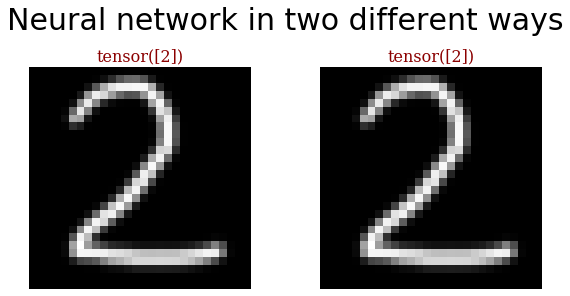

In [48]:
out_net_class=net_class(input_img.view(1,28*28))
idx_class, salida_class=torch.max(out_net_class,1)

out_net_seque=net_seque(input_img.view(1,28*28))
idx_seque, salida_seque=torch.max(out_net_seque,1)

fig, axs = plt.subplots(1,2, constrained_layout=True)
fig.set_size_inches(8, 4)
fig.suptitle('Neural network in two different ways', fontsize=30)
axs[0].imshow(input_img, cmap='gray')
axs[0].set_title(str(salida_class),  fontdict=font)
axs[0].axis('off')

axs[1].imshow(input_img, cmap='gray')
axs[1].set_title(str(salida_seque),  fontdict=font)
axs[1].axis('off')

plt.show()